<a href="https://colab.research.google.com/github/JCaesarLG/ML-Projects/blob/main/House_Price_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

DATA EXTRACTION

In [ ]:
house = pd.read_csv(f"/content/drive/MyDrive/Raw_Data/london_houses.csv")
house.head(2), house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Address          1000 non-null   object
 1   Neighborhood     1000 non-null   object
 2   Bedrooms         1000 non-null   int64 
 3   Bathrooms        1000 non-null   int64 
 4   Square Meters    1000 non-null   int64 
 5   Building Age     1000 non-null   int64 
 6   Garden           1000 non-null   object
 7   Garage           1000 non-null   object
 8   Floors           1000 non-null   int64 
 9   Property Type    1000 non-null   object
 10  Heating Type     1000 non-null   object
 11  Balcony          1000 non-null   object
 12  Interior Style   1000 non-null   object
 13  View             1000 non-null   object
 14  Materials        1000 non-null   object
 15  Building Status  1000 non-null   object
 16  Price (£)        1000 non-null   int64 
dtypes: int64(6), object(11)
memory usa

(             Address  Neighborhood  Bedrooms  Bathrooms  Square Meters  \
 0   78 Regent Street  Notting Hill         2          3            179   
 1  198 Oxford Street   Westminster         2          1            123   
 
    Building Age Garden Garage  Floors  Property Type      Heating Type  \
 0            72     No     No       3  Semi-Detached  Electric Heating   
 1            34    Yes     No       1      Apartment   Central Heating   
 
               Balcony Interior Style    View          Materials  \
 0  High-level Balcony     Industrial  Garden             Marble   
 1  High-level Balcony     Industrial    City  Laminate Flooring   
 
   Building Status  Price (£)  
 0       Renovated    2291200  
 1             Old    1476000  ,
 None)

DATA ANALYSIS

---

In [ ]:
sns.set()

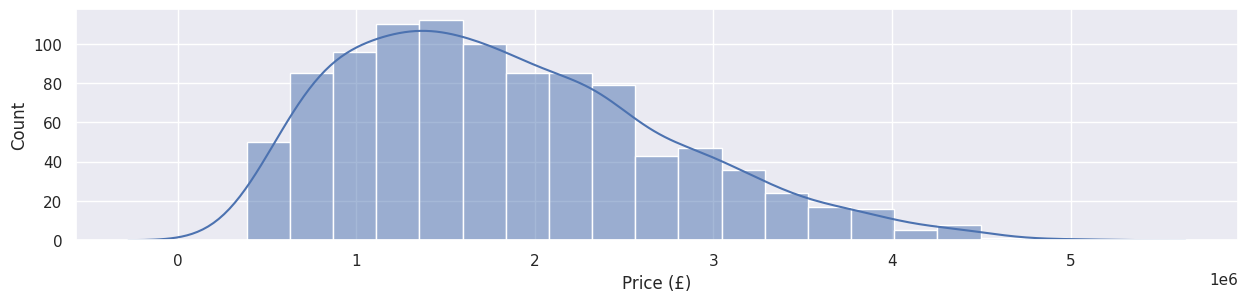

In [ ]:
plt.figure(figsize=(15,3))
sns.histplot(house['Price (£)'], kde=True,
             kde_kws=dict(cut=3))
plt.show()

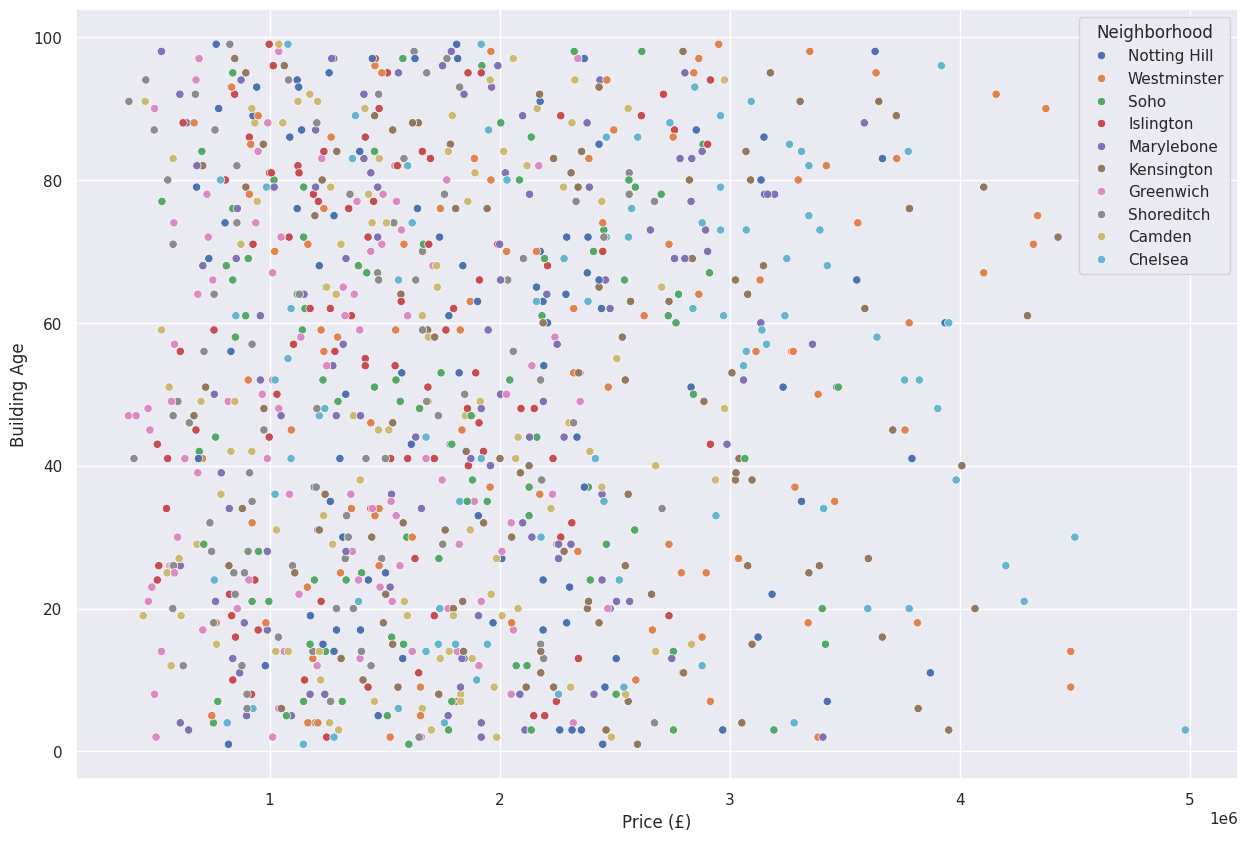

In [ ]:
plt.figure(figsize=(15,10))
sns.scatterplot(data=house, x ='Price (£)', y ='Building Age', hue='Neighborhood')
plt.show()

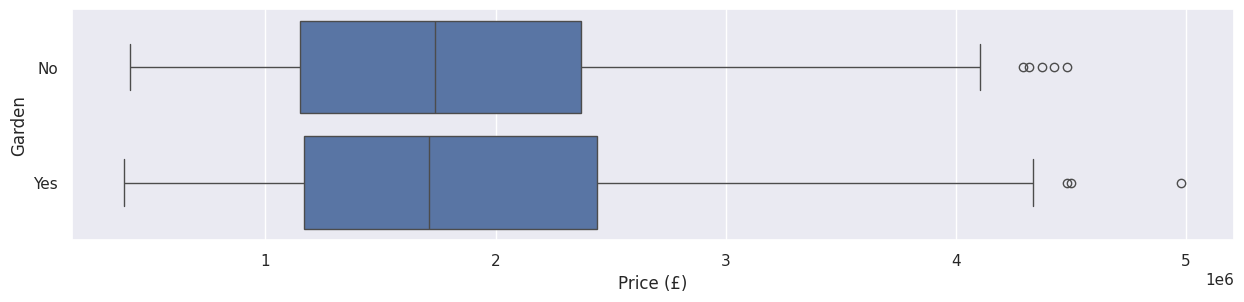

In [ ]:
plt.figure(figsize=(15,3))
sns.boxplot(data=house, x ='Price (£)', y ='Garden')
plt.show()

DATA PREPROCESSING

---

In [ ]:
house = house.drop('Address', axis=1)

In [ ]:
enc = LabelEncoder()

obj = house.select_dtypes(include='object').columns

for i in obj:
  house[i] = enc.fit_transform(house[i])
house.head(2)

,Neighborhood,Bedrooms,Bathrooms,Square Meters,Building Age,Garden,Garage,Floors,Property Type,Heating Type,Balcony,Interior Style,View,Materials,Building Status,Price (£)
0,6,2,3,179,72,0,0,3,2,1,0,1,1,2,2,2291200
1,9,2,1,123,34,1,0,1,0,0,0,1,0,1,1,1476000


In [ ]:
corr = house.corr()

In [ ]:
print(corr['Price (£)'].sort_values(ascending=False).round(3)*100)

Price (£)          100.0
Square Meters       79.1
Property Type       14.8
Interior Style       8.7
Neighborhood         5.8
Garage               4.7
Materials            4.1
Building Age         3.2
Floors               1.6
Building Status      0.6
Garden              -0.9
Bedrooms            -1.7
Heating Type        -1.9
Balcony             -2.1
View                -2.2
Bathrooms           -3.3
Name: Price (£), dtype: float64


MACHINE LEARNING MODEL BUILDING

---

In [ ]:
X = house.drop('Price (£)', axis=1)
y = house['Price (£)']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rg = RandomForestRegressor(n_estimators=100, random_state=42)
rg.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

MODEL EVALUATION

---

In [ ]:
test_pred = rg.predict(X_test)
acc_score = r2_score(y_test, test_pred)
print(f"accuracy score for test is {acc_score}")

importance = rg.feature_importances_.round(3)*100
columns = X.columns
feature_importance = pd.DataFrame({'Feature': columns,
                                   'Importance': importance}).sort_values(by='Importance', ascending=False)
print("\nFeature Importance")
print(feature_importance)

accuracy score for test is 0.8944434567793942

Feature Importance
            Feature  Importance
3     Square Meters        67.4
0      Neighborhood        12.9
8     Property Type        11.5
4      Building Age         1.6
12             View         0.9
1          Bedrooms         0.8
13        Materials         0.8
9      Heating Type         0.7
11   Interior Style         0.7
2         Bathrooms         0.6
6            Garage         0.5
10          Balcony         0.5
7            Floors         0.4
14  Building Status         0.4
5            Garden         0.3
